In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train, x_test = x_train/255, x_test/255

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.5221 - accuracy: 0.8125 - val_loss: 0.4275 - val_accuracy: 0.8446
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4046 - accuracy: 0.8529 - val_loss: 0.3927 - val_accuracy: 0.8605
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3727 - accuracy: 0.8638 - val_loss: 0.3665 - val_accuracy: 0.8680
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3541 - accuracy: 0.8699 - val_loss: 0.3559 - val_accuracy: 0.8714
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3362 - accuracy: 0.8756 - val_loss: 0.3616 - val_accuracy: 0.8709
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3236 - accuracy: 0.8819 - val_loss: 0.3452 - val_accuracy: 0.8766
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3143 - accuracy: 0.8835 - val_loss: 0.3790 - val_acc

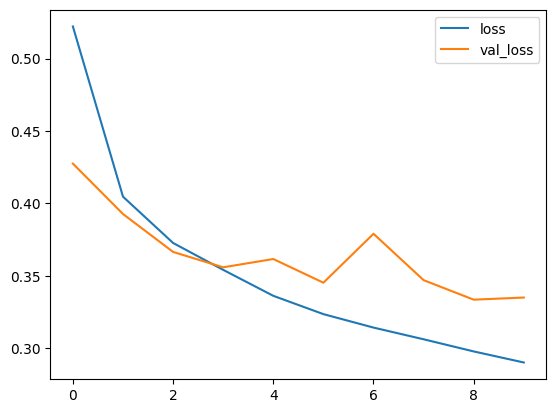

In [ ]:
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend();

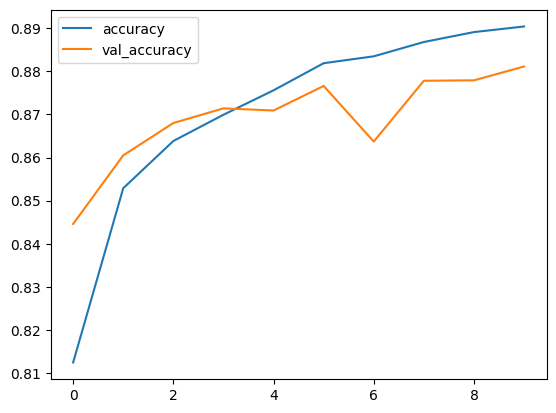

In [ ]:
plt.plot(r.history["accuracy"], label = "accuracy")
plt.plot(r.history["val_accuracy"], label = "val_accuracy")
plt.legend();

In [ ]:
y_preds = model.predict(x_test).argmax(axis=1)
y_preds

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

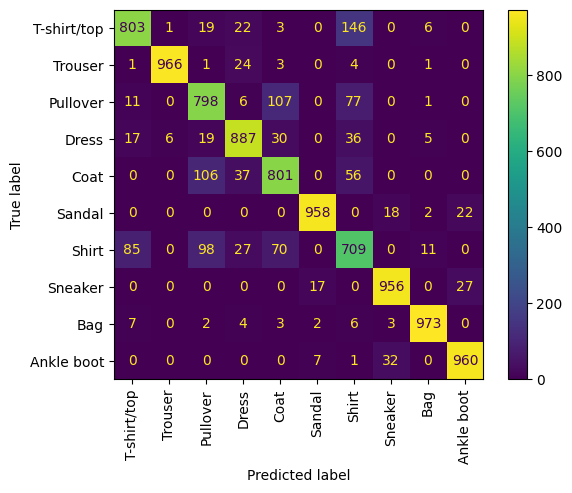

In [ ]:
cm = confusion_matrix(y_test, y_preds)
matrix = ConfusionMatrixDisplay(cm, display_labels=class_names)
matrix.plot(xticks_rotation="vertical");

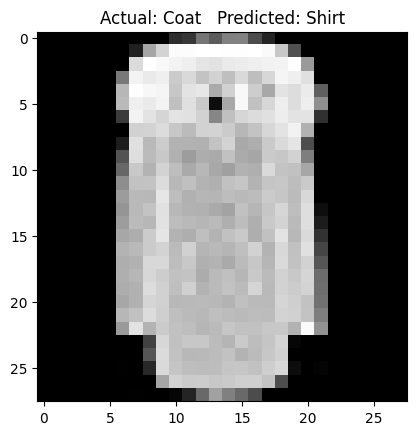

In [ ]:
wrongIdx = np.where(y_preds != y_test)[0]
idx = np.random.choice(wrongIdx)
plt.imshow(x_test[idx], cmap = "gray")
plt.title(f"Actual: {class_names[y_test[idx]]}   Predicted: {class_names[y_preds[idx]]}");